In [35]:
# matplotlib_line 그래프 그리기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# 한글폰트 깨짐 방지

from matplotlib import font_manager, rc

font_path = '../visualization/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 마이너스 부호 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


In [37]:
!pip install --upgrade pip

In [38]:
!pip install openpyxl

In [39]:
data = pd.read_excel('../../data_add/시도별 전출입 인구수.xlsx', header = 0)


c:\Users\SBAUser\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [40]:
df = data.copy()

In [41]:
# 누락값(NaN)을 앞 데이터로 채움
df = df.fillna(method = 'ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [42]:
# 서울 >> 타지역 이동 데이터 추출, 정리

condition = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[condition]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename(columns = {'전입지별' : '전입지'}, inplace = True)
df_seoul.set_index('전입지', inplace = True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [43]:
df.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

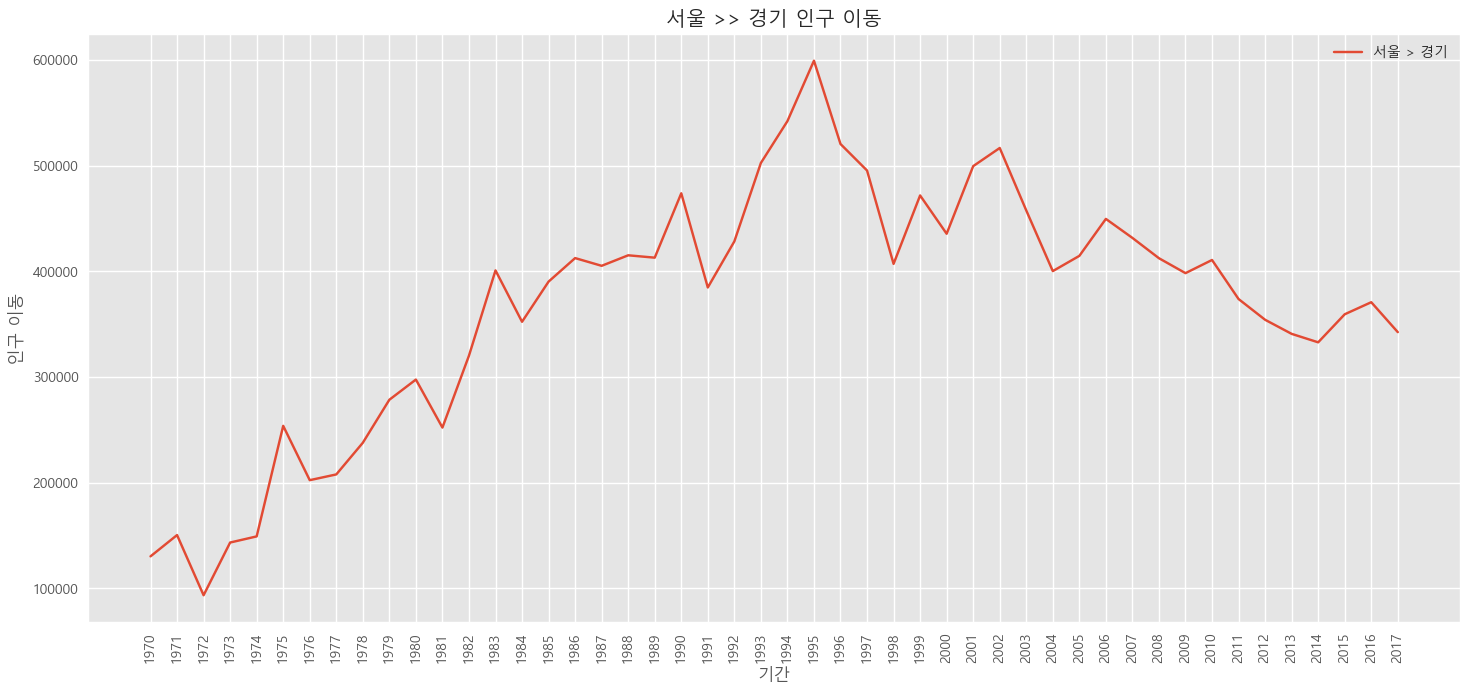

In [44]:
# 서울 >> 경기도로 이주한 인구데이터 값만 추출

df_kg = df_seoul.loc['경기도']

# 그림 사이즈 지정
plt.figure(figsize = (14, 6))

# R의 ggplot 스타일

plt.style.use('ggplot')

plt.plot(df_kg.index, df_kg.values)

# 차트제목 추가
plt.title('서울 >> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('인구 이동')

# x축 눈금 라벨 회전
plt.xticks(rotation = 90)

# 범례

plt.legend(labels = ['서울 > 경기'], loc = 'best')




plt.show()

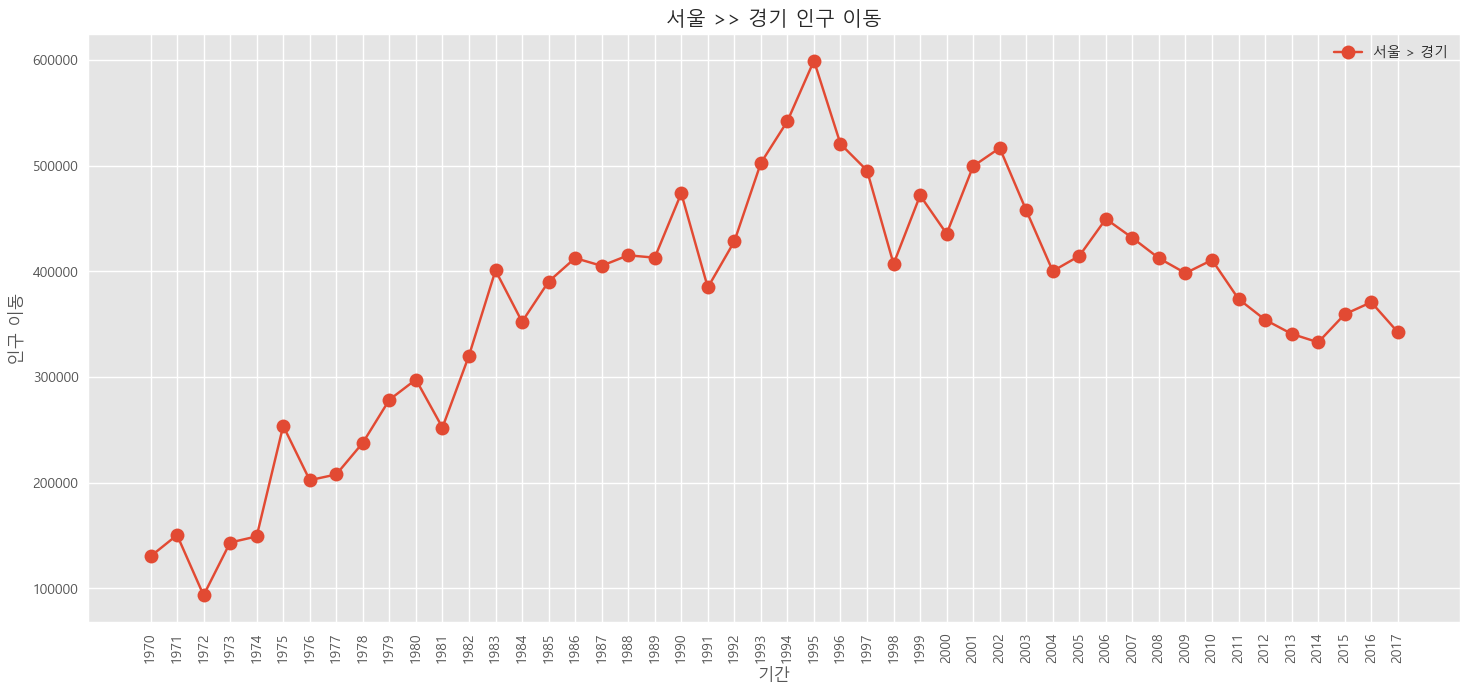

In [45]:
# 서울 >> 경기도로 이주한 인구데이터 값만 추출

df_kg = df_seoul.loc['경기도']

# 그림 사이즈 지정
plt.figure(figsize = (14, 6))

# R의 ggplot 스타일

plt.style.use('ggplot')

plt.plot(df_kg.index, df_kg.values, marker = 'o', markersize = '10') # marker > 마커 생성 markersize > 마커크기 

# 차트제목 추가
plt.title('서울 >> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('인구 이동')

# x축 눈금 라벨 회전
plt.xticks(rotation = 90)

# 범례

plt.legend(labels = ['서울 > 경기'], loc = 'best')




plt.show()

In [46]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


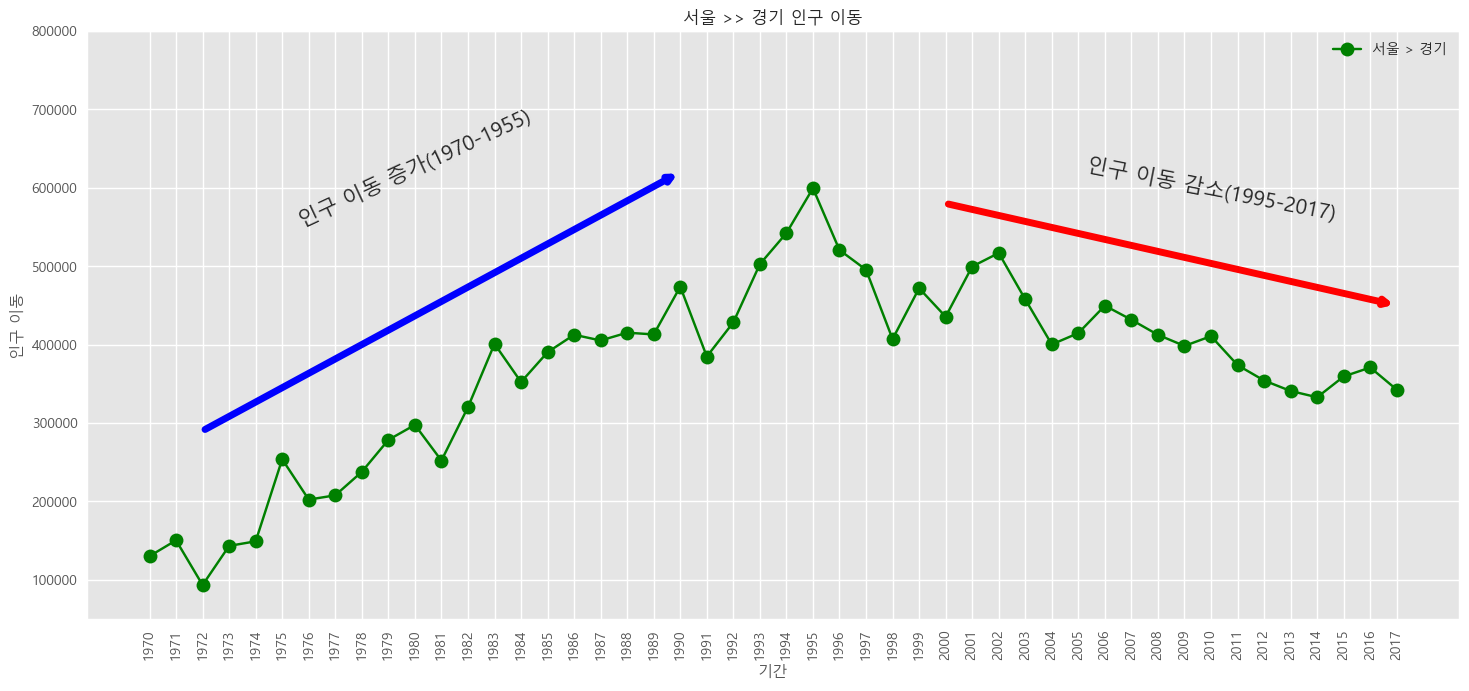

In [56]:
# 서울 >> 경기도로 이주한 인구데이터 값만 추출

df_kg = df_seoul.loc['경기도']

# 그림 사이즈 지정
plt.figure(figsize = (14, 6))

# 스타일 변경

plt.style.use('seaborn-v0_8-notebook')

plt.plot(df_kg.index, df_kg.values, marker = 'o', markersize = '10', color = 'g') # marker > 마커 생성 markersize > 마커크기 

# 차트제목 추가
plt.title('서울 >> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('인구 이동')

# x축 눈금 라벨 회전
plt.xticks(rotation = 90)

# 범례

plt.legend(labels = ['서울 > 경기'], loc = 'best')

# y축 범위 지정(최솟값, 최댓값)
plt.ylim(50000, 800000)

# 주석표시(annotation)

plt.annotate('',
             xy = (20, 620000),          # 화살표의 머리부분(끝점)
             xytext = (2, 290000),       # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',          
             arrowprops = dict(arrowstyle = '->', color = 'blue', lw = 5)) # lw : line width

plt.annotate('',
             xy = (47, 450000),          # 화살표의 머리부분(끝점)
             xytext = (30, 580000),       # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',          
             arrowprops = dict(arrowstyle = '->', color = 'red', lw = 5))

plt.annotate('인구 이동 증가(1970-1955)',    # 텍스트 입력
             xy = (10, 550000),             # 텍스트 위치 기준점
             rotation = 25,                 # 텍스트 회전 각도도
             va = 'baseline',               # 텍스트 상하 정렬
             ha = 'center',                 # 텍스트 좌우 정렬
             fontsize = 15)                 # 텍스트 크기

plt.annotate('인구 이동 감소(1995-2017)',
             xy = (40, 560000),
             rotation = -11,
             va = 'baseline', 
             ha = 'center',
             fontsize = 15)

plt.show()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\2963007404.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_kg.index, rotation = 75)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\2963007404.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_kg.index, rotation = 75)


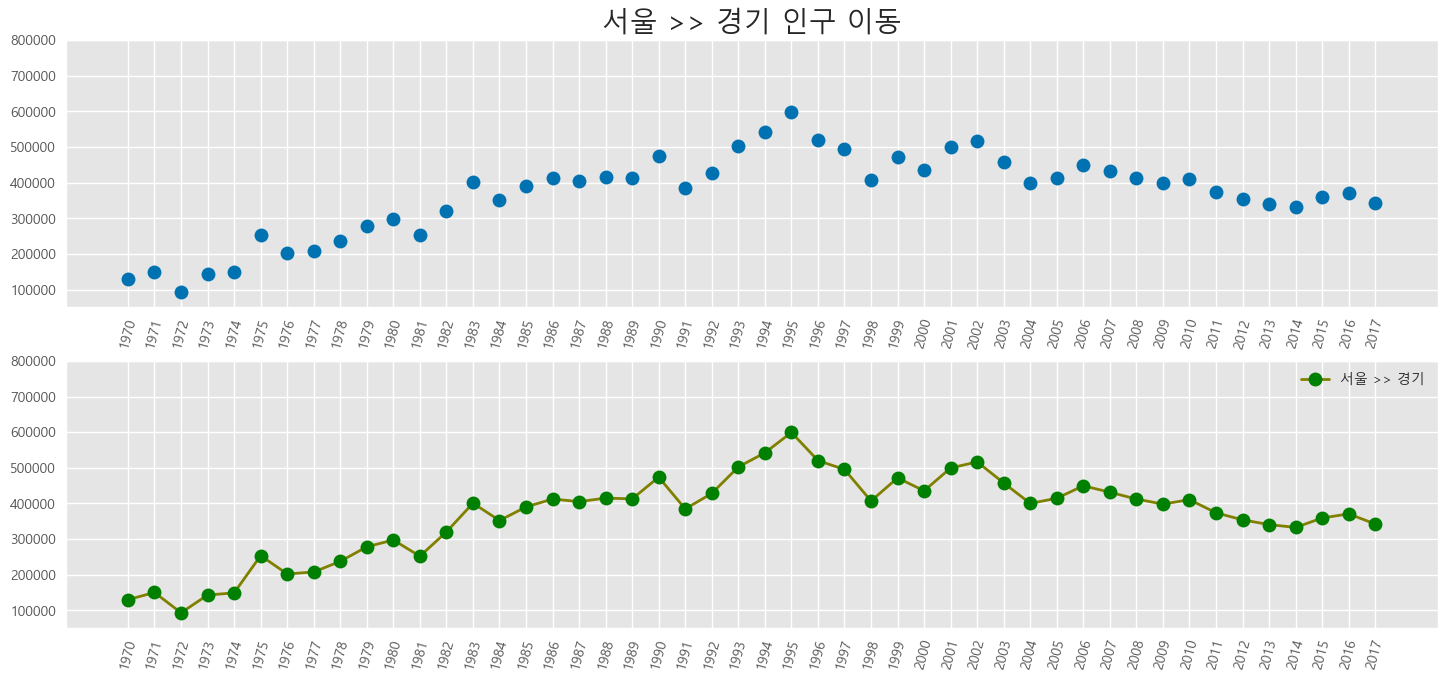

In [67]:
# 서울 >> 경기도로 이주한 인구데이터 값만 추출

df_kg = df_seoul.loc['경기도']


plt.style.use('seaborn-v0_8-colorblind')


# 그래프 객체 생성(figure 에 2개의 subplots 생성)

fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# 차트 제목 만들기
ax1.set_title('서울 >> 경기 인구 이동', size = 20)

# axe 객체에 plot 함수로 그래프 출력

ax1.plot(df_kg, 'o', markersize = 10)
ax2.plot(df_kg, marker = 'o', markerfacecolor = 'green', markersize = 10,
         color = 'olive', linewidth = 2, label = '서울 >> 경기')

ax2.legend(loc = 'best')

# y축 범위 지정(최솟값, 최댓값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 회전

ax1.set_xticklabels(df_kg.index, rotation = 75)
ax2.set_xticklabels(df_kg.index, rotation = 75)

ax1.tick_params(axis = 'x', labelsize = 10)
ax1.tick_params(axis = 'y', labelsize = 10)

ax2.tick_params(axis = 'x', labelsize = 10)
ax2.tick_params(axis = 'y', labelsize = 10)

plt.show()

In [68]:
df_seoul.index

Index(['전국', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지')

In [73]:
# 서울 >> 충청남도, 제주특별자치도, 강원도 이동한 인구데이터 값만 선택

col_years = list(map(str, range(1970, 2018)))

df_3 = df_seoul.loc[['충청남도', '제주특별자치도','강원도'], col_years]



C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\2317712432.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 75)


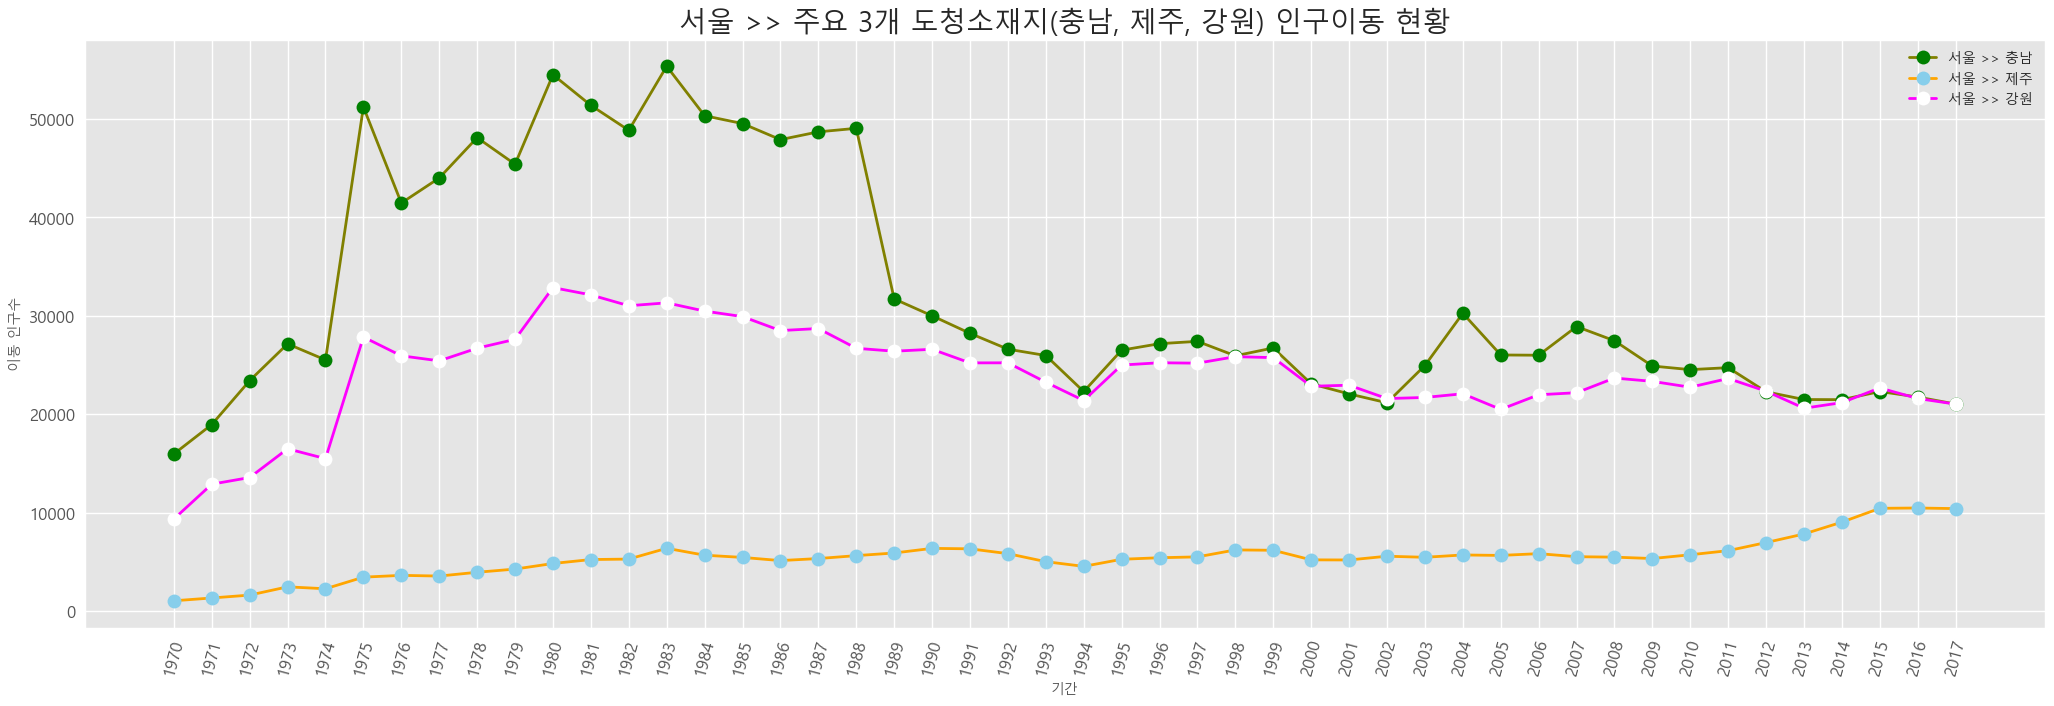

In [85]:
# 스타일 지정
plt.style.use('ggplot')

# 그래프 생성
fig = plt.figure(figsize = (20, 6))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot함수로 그래프 그리기
ax.plot(col_years, df_3.loc['충청남도', :], marker = 'o', markerfacecolor = 'green', markersize = 10,
        color = 'olive', linewidth = 2, label = '서울 >> 충남')
ax.plot(col_years, df_3.loc['제주특별자치도', :], marker = 'o', markerfacecolor = 'skyblue', markersize = 10,
        color = 'orange', linewidth = 2, label = '서울 >> 제주')
ax.plot(col_years, df_3.loc['강원도', :], marker = 'o', markerfacecolor = 'white', markersize = 10,
        color = 'magenta', linewidth = 2, label = '서울 >> 강원')

# 범례
ax.legend(loc = 'best')

# 차트 제목
ax.set_title('서울 >> 주요 3개 도청소재지(충남, 제주, 강원) 인구이동 현황', size = 20)

# 축이름 추가
ax.set_xlabel('기간', size = 10)
ax.set_ylabel('이동 인구수', size = 10)

# 축 눈금 라벨 지정 및 회전
ax.set_xticklabels(col_years, rotation = 75)

# 축 눈금 라벨 크기
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\1803631441.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 75)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\1803631441.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 75)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\1803631441.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 75)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\1803631441.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 75)
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15172\1803631441.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(col_years, rotation = 75)
C:\Users\SBAUser\AppData\Local\Temp

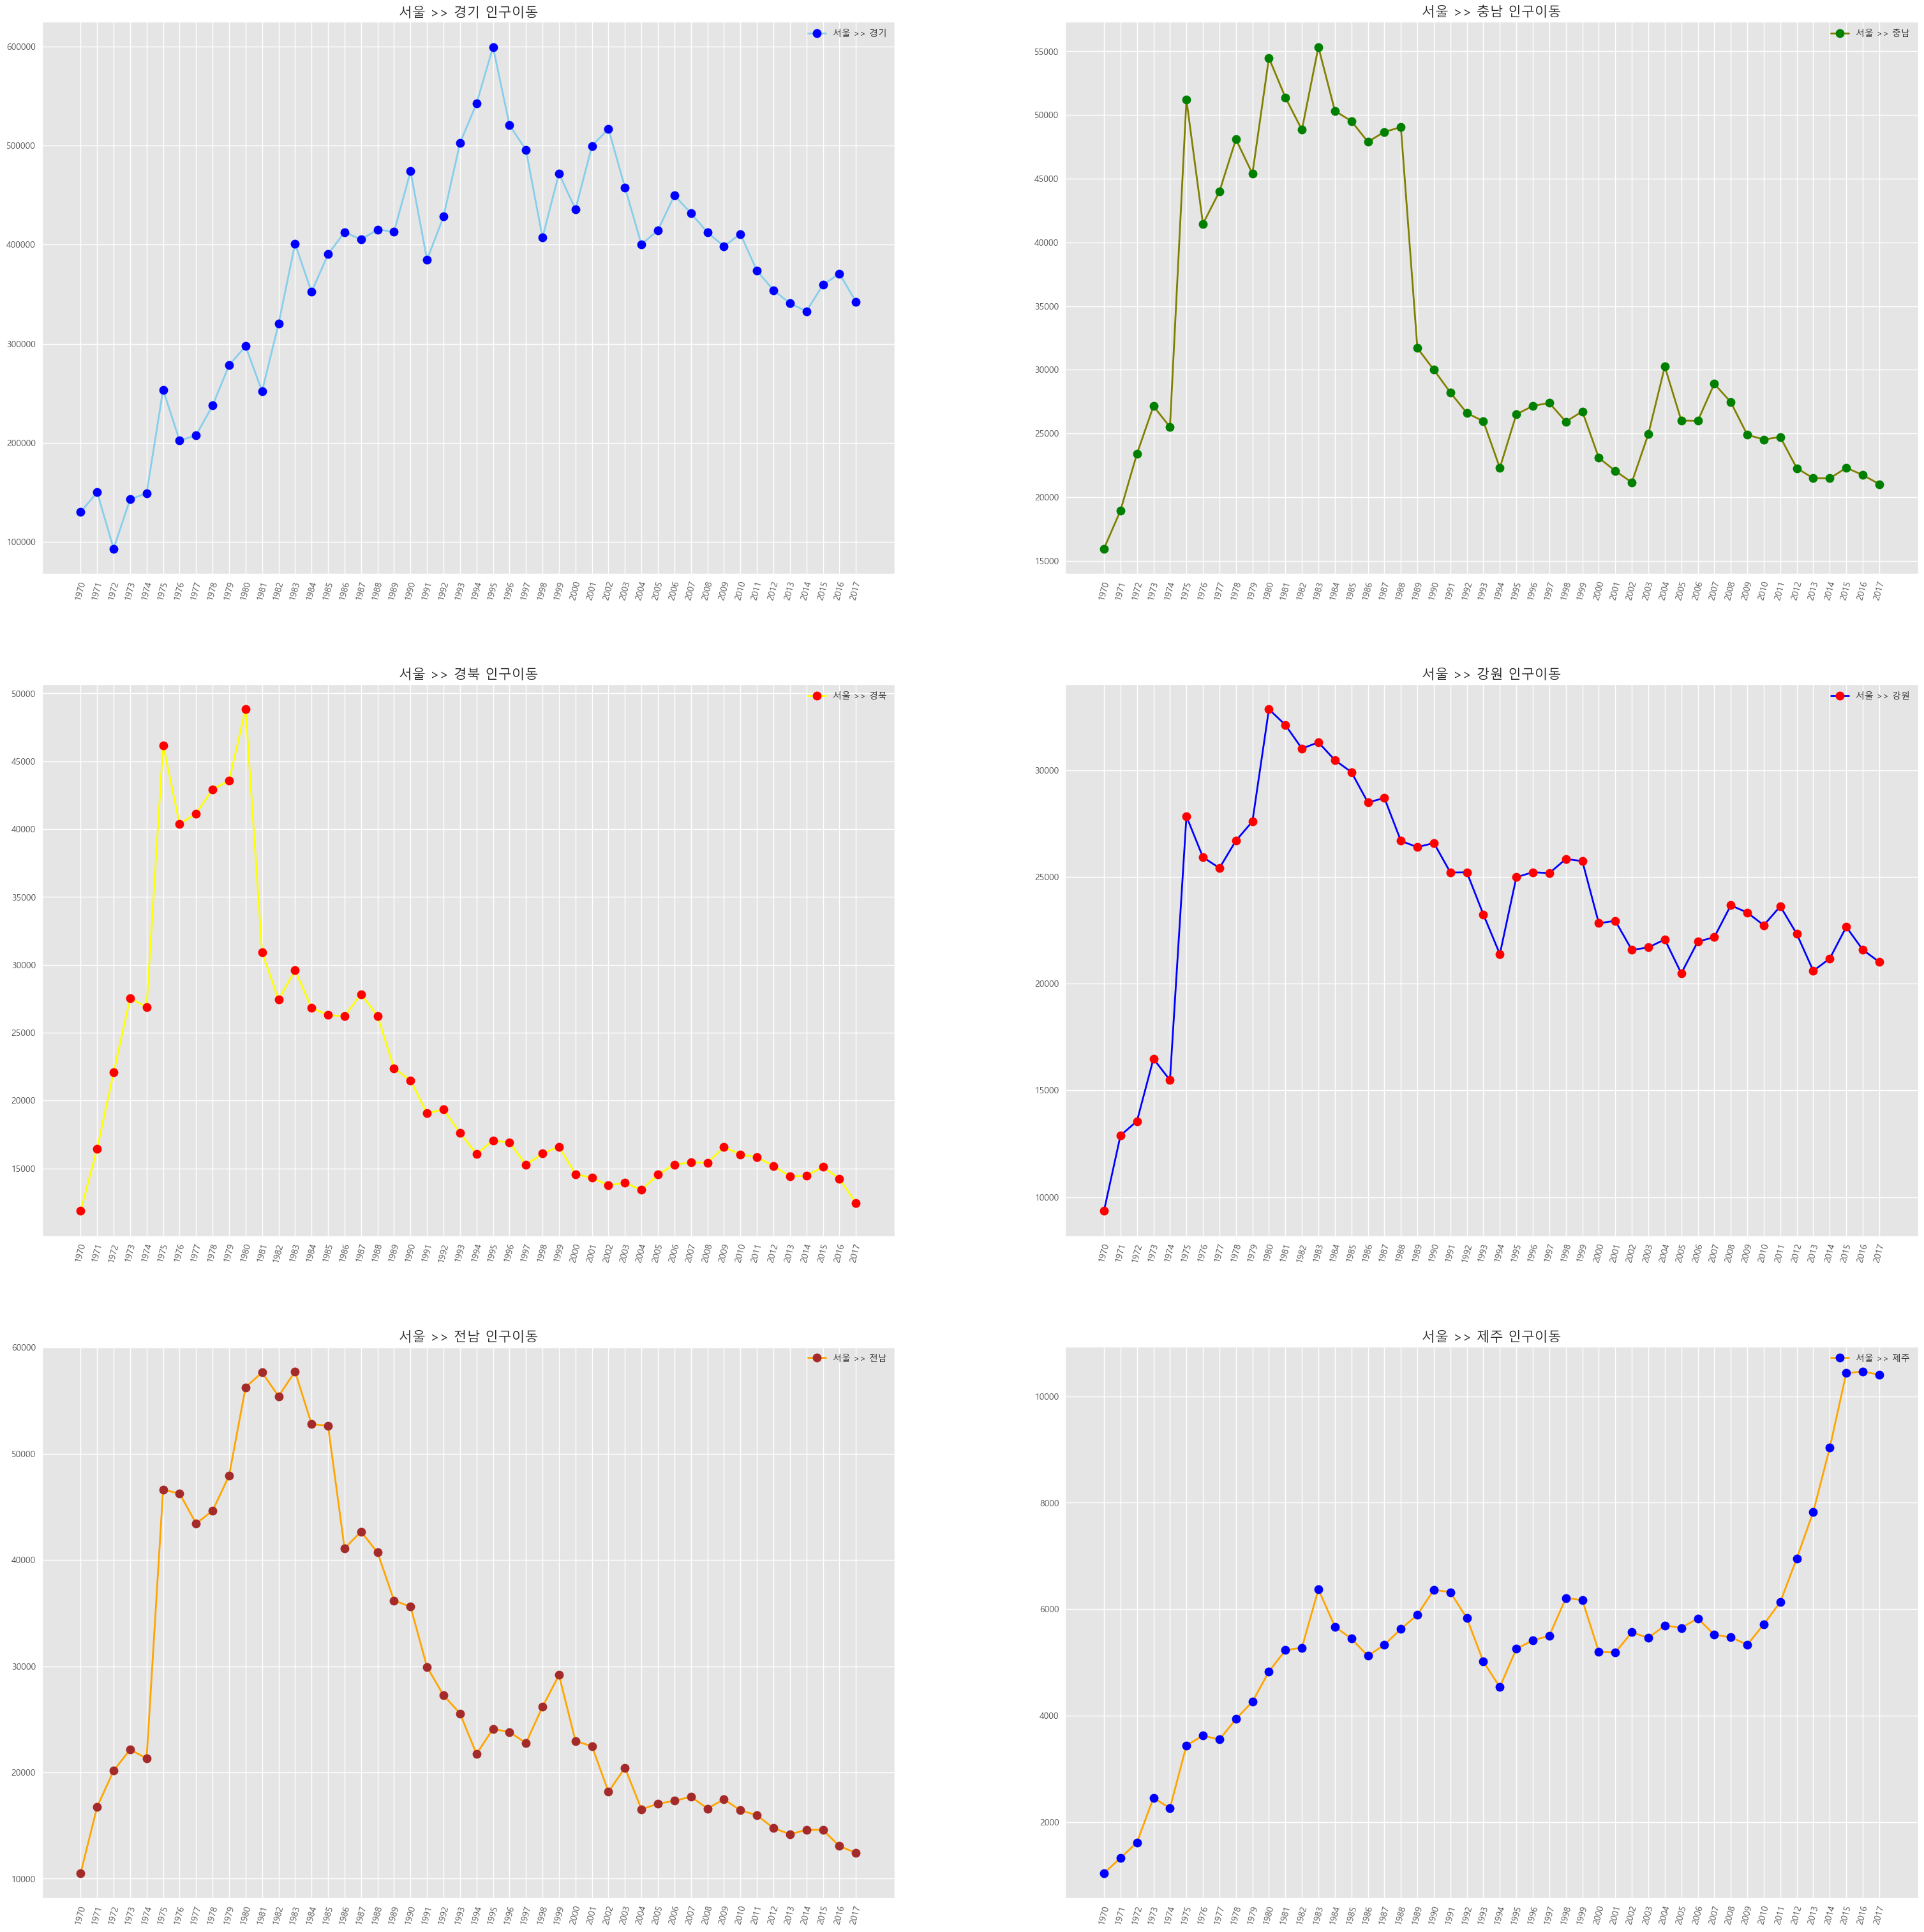

In [119]:
# 서울 >> 경기,충남, 경북, 강원, 전남,, 제주

col_years = list(map(str, range(1970, 2018)))
df_6 = df_seoul.loc[['경기도', '충청남도', '경상북도', '강원도', '전라남도', '제주특별자치도'], col_years]


# 스타일 서식 지정
plt.style.use('ggplot')

fig = plt.figure(figsize = (30, 30))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

# axe 객체에 plot 함수로 그래프 그리기
ax1.plot(col_years, df_6.loc['경기도', :], marker = 'o', markerfacecolor = 'blue',
         markersize = 10, color = 'skyblue', linewidth = 2, label = '서울 >> 경기')
ax2.plot(col_years, df_6.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
         markersize = 10, color = 'olive', linewidth = 2, label = '서울 >> 충남')
ax3.plot(col_years, df_6.loc['경상북도', :], marker = 'o', markerfacecolor = 'red',
         markersize = 10, color = 'yellow', linewidth = 2, label = '서울 >> 경북')
ax4.plot(col_years, df_6.loc['강원도', :], marker = 'o', markerfacecolor = 'red',
         markersize = 10, color = 'blue', linewidth = 2, label = '서울 >> 강원')
ax5.plot(col_years, df_6.loc['전라남도', :], marker = 'o', markerfacecolor = 'brown',
         markersize = 10, color = 'orange', linewidth = 2, label = '서울 >> 전남')
ax6.plot(col_years, df_6.loc['제주특별자치도', :], marker = 'o', markerfacecolor = 'blue',
         markersize = 10, color = 'orange', linewidth = 2, label = '서울 >> 제주')

# 범례
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')
ax5.legend(loc = 'best')
ax6.legend(loc = 'best')

# 차트 제목 추가
ax1.set_title('서울 >> 경기 인구이동', size = 15)
ax2.set_title('서울 >> 충남 인구이동', size = 15)
ax3.set_title('서울 >> 경북 인구이동', size = 15)
ax4.set_title('서울 >> 강원 인구이동', size = 15)
ax5.set_title('서울 >> 전남 인구이동', size = 15)
ax6.set_title('서울 >> 제주 인구이동', size = 15)

# 축 눈금 라벨 지정 및 회전
ax1.set_xticklabels(col_years, rotation = 75)
ax2.set_xticklabels(col_years, rotation = 75)
ax3.set_xticklabels(col_years, rotation = 75)
ax4.set_xticklabels(col_years, rotation = 75)
ax5.set_xticklabels(col_years, rotation = 75)
ax6.set_xticklabels(col_years, rotation = 75)








plt.show()

In [120]:
import matplotlib

colors = {}

for name, hex in matplotlib.colors.cnames.items() :
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [121]:
df_6 = df_6.T

In [122]:
df_6.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [123]:
df_6.columns

Index(['경기도', '충청남도', '경상북도', '강원도', '전라남도', '제주특별자치도'], dtype='object', name='전입지')

In [124]:
# 데이터 프레임의 인덱스를 정수형으로 변경(x 눈금 라벨 표시)

df_6.index = df_6.index.map(int)

<AxesSubplot: >

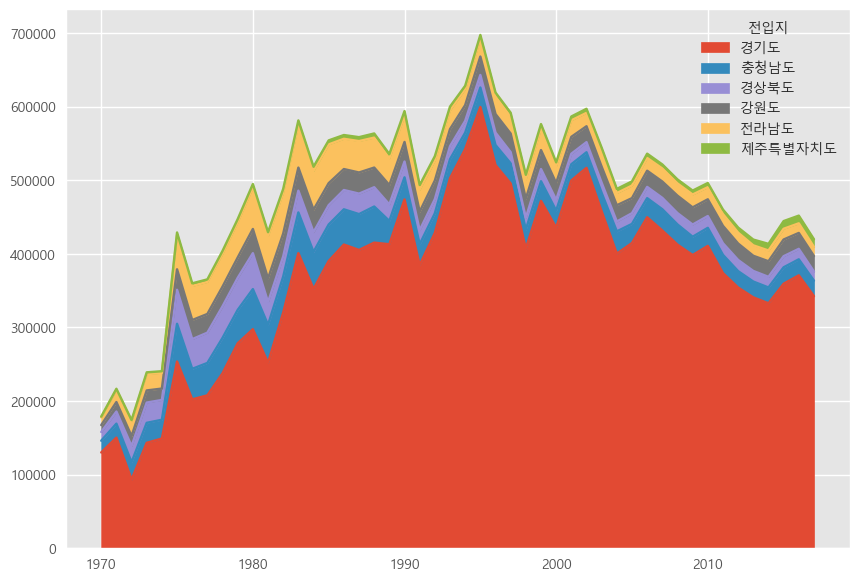

In [125]:
# 면적 그래프 그리기

df_6.plot(kind = 'area')

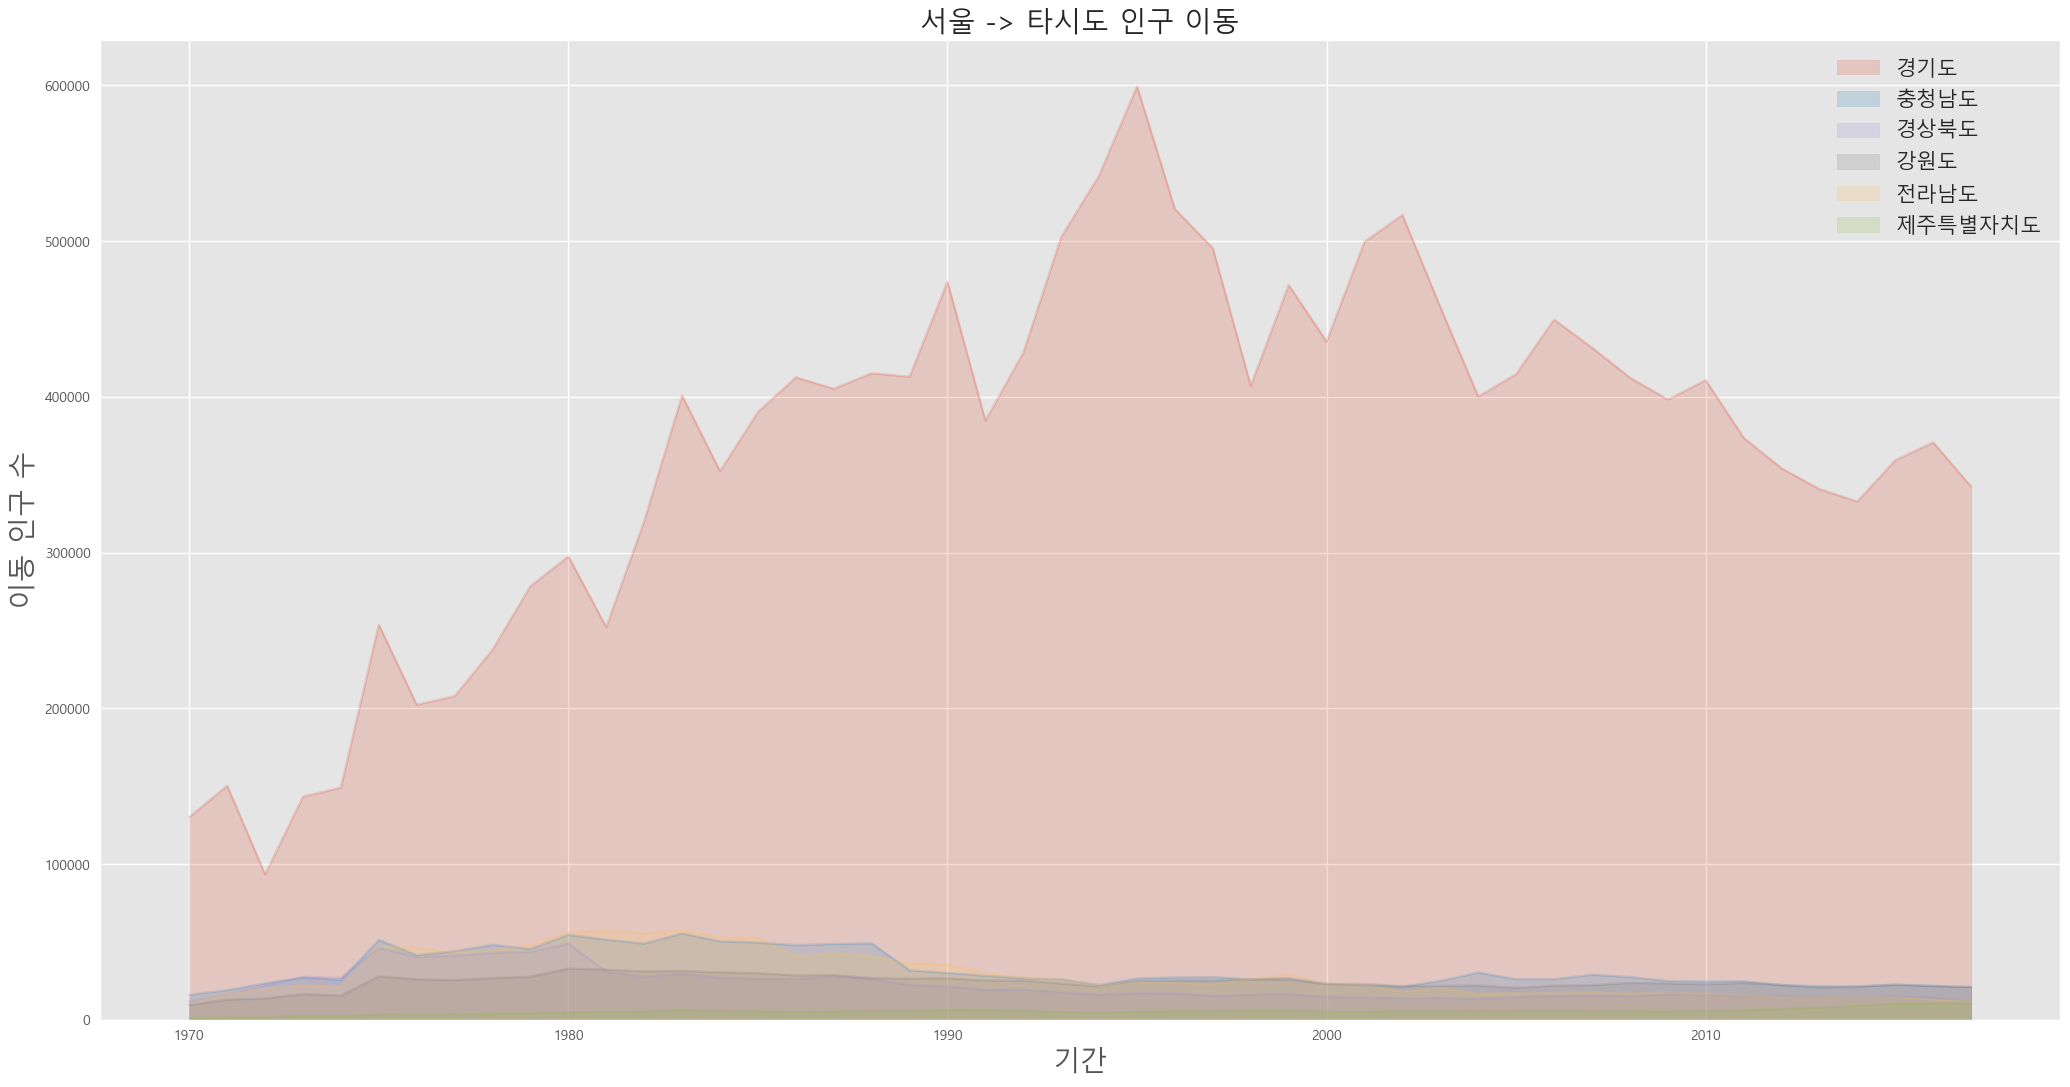

In [126]:
df_6.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20, 10))
plt.title('서울 -> 타시도 인구 이동', size = 20)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구 수', size = 20)

plt.legend(loc = 'best', fontsize = 15)

plt.show()

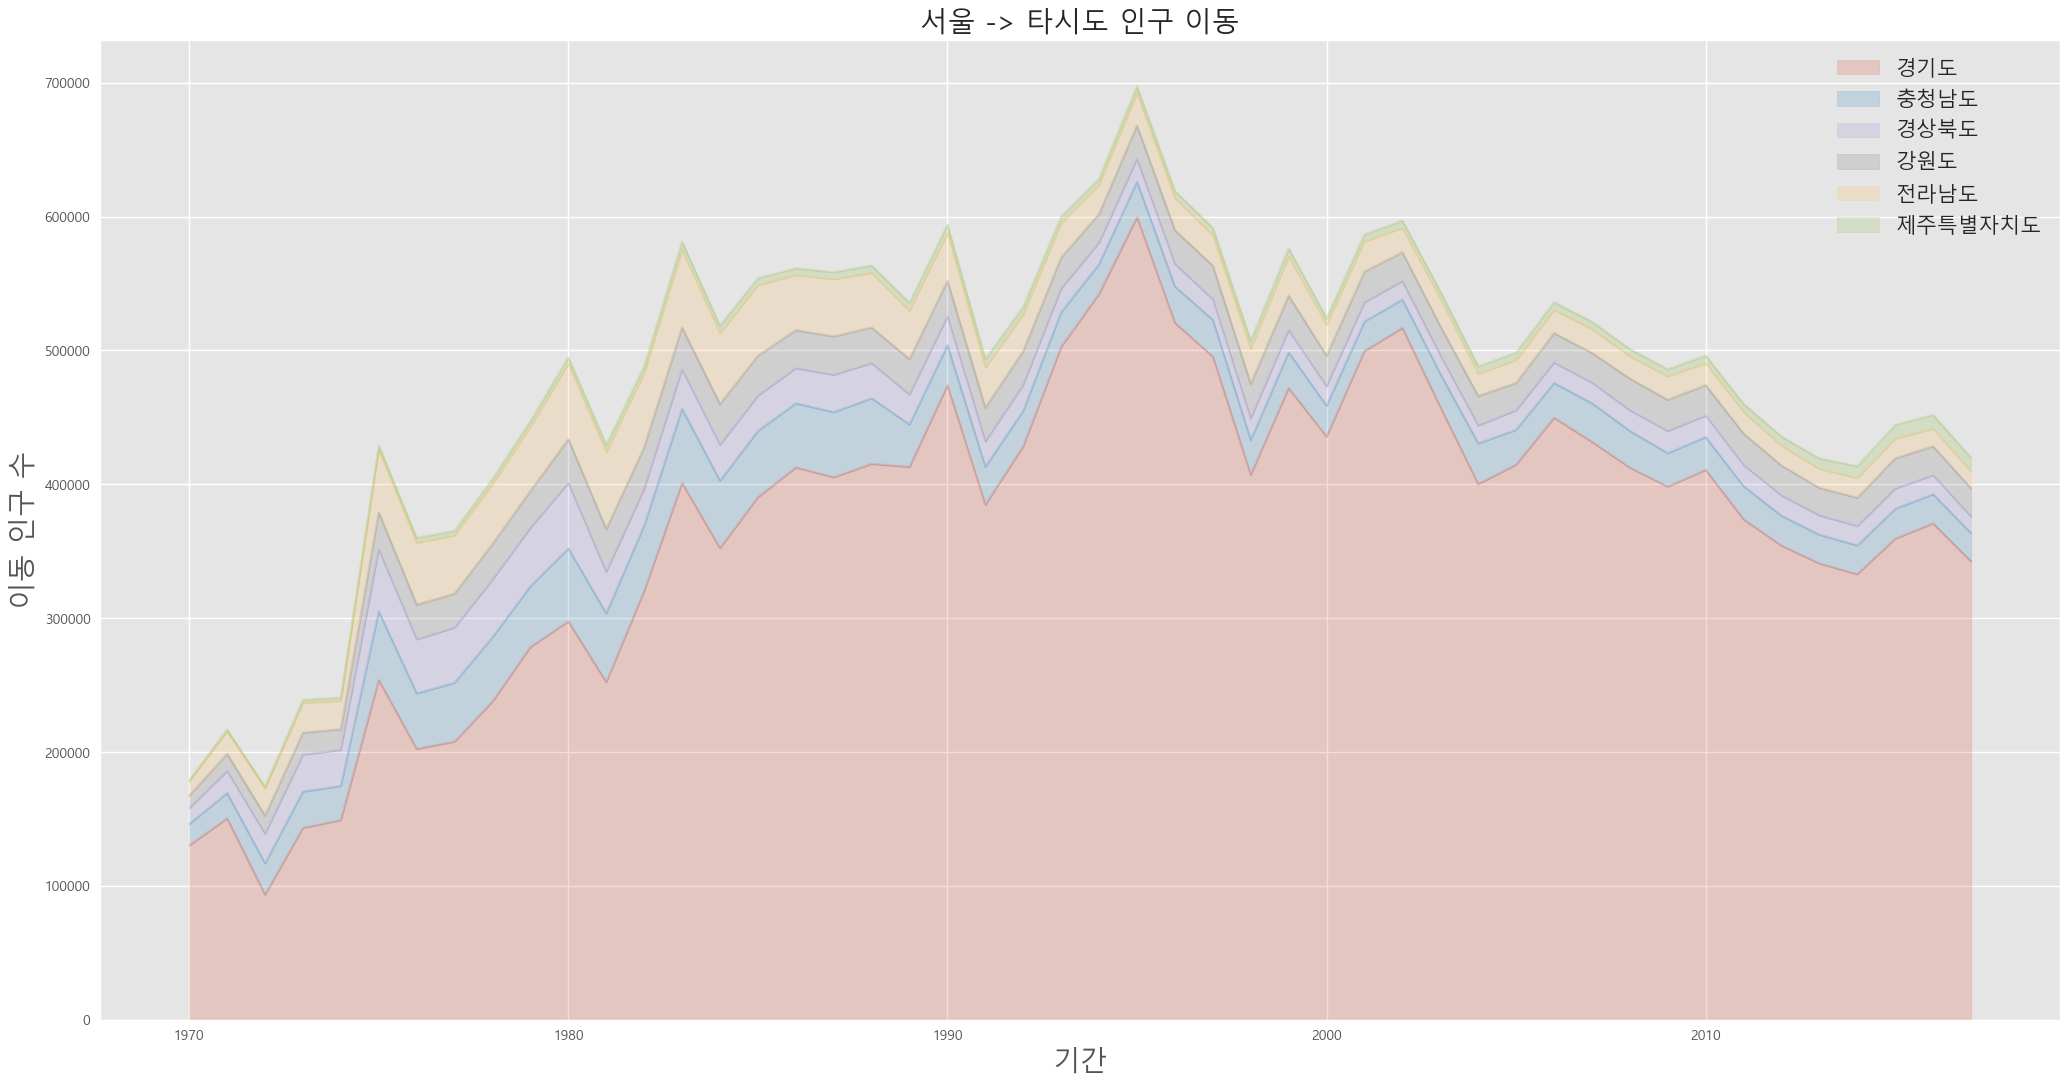

In [108]:
df_6.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))
plt.title('서울 -> 타시도 인구 이동', size = 20)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구 수', size = 20)

plt.legend(loc = 'best', fontsize = 15)

plt.show()

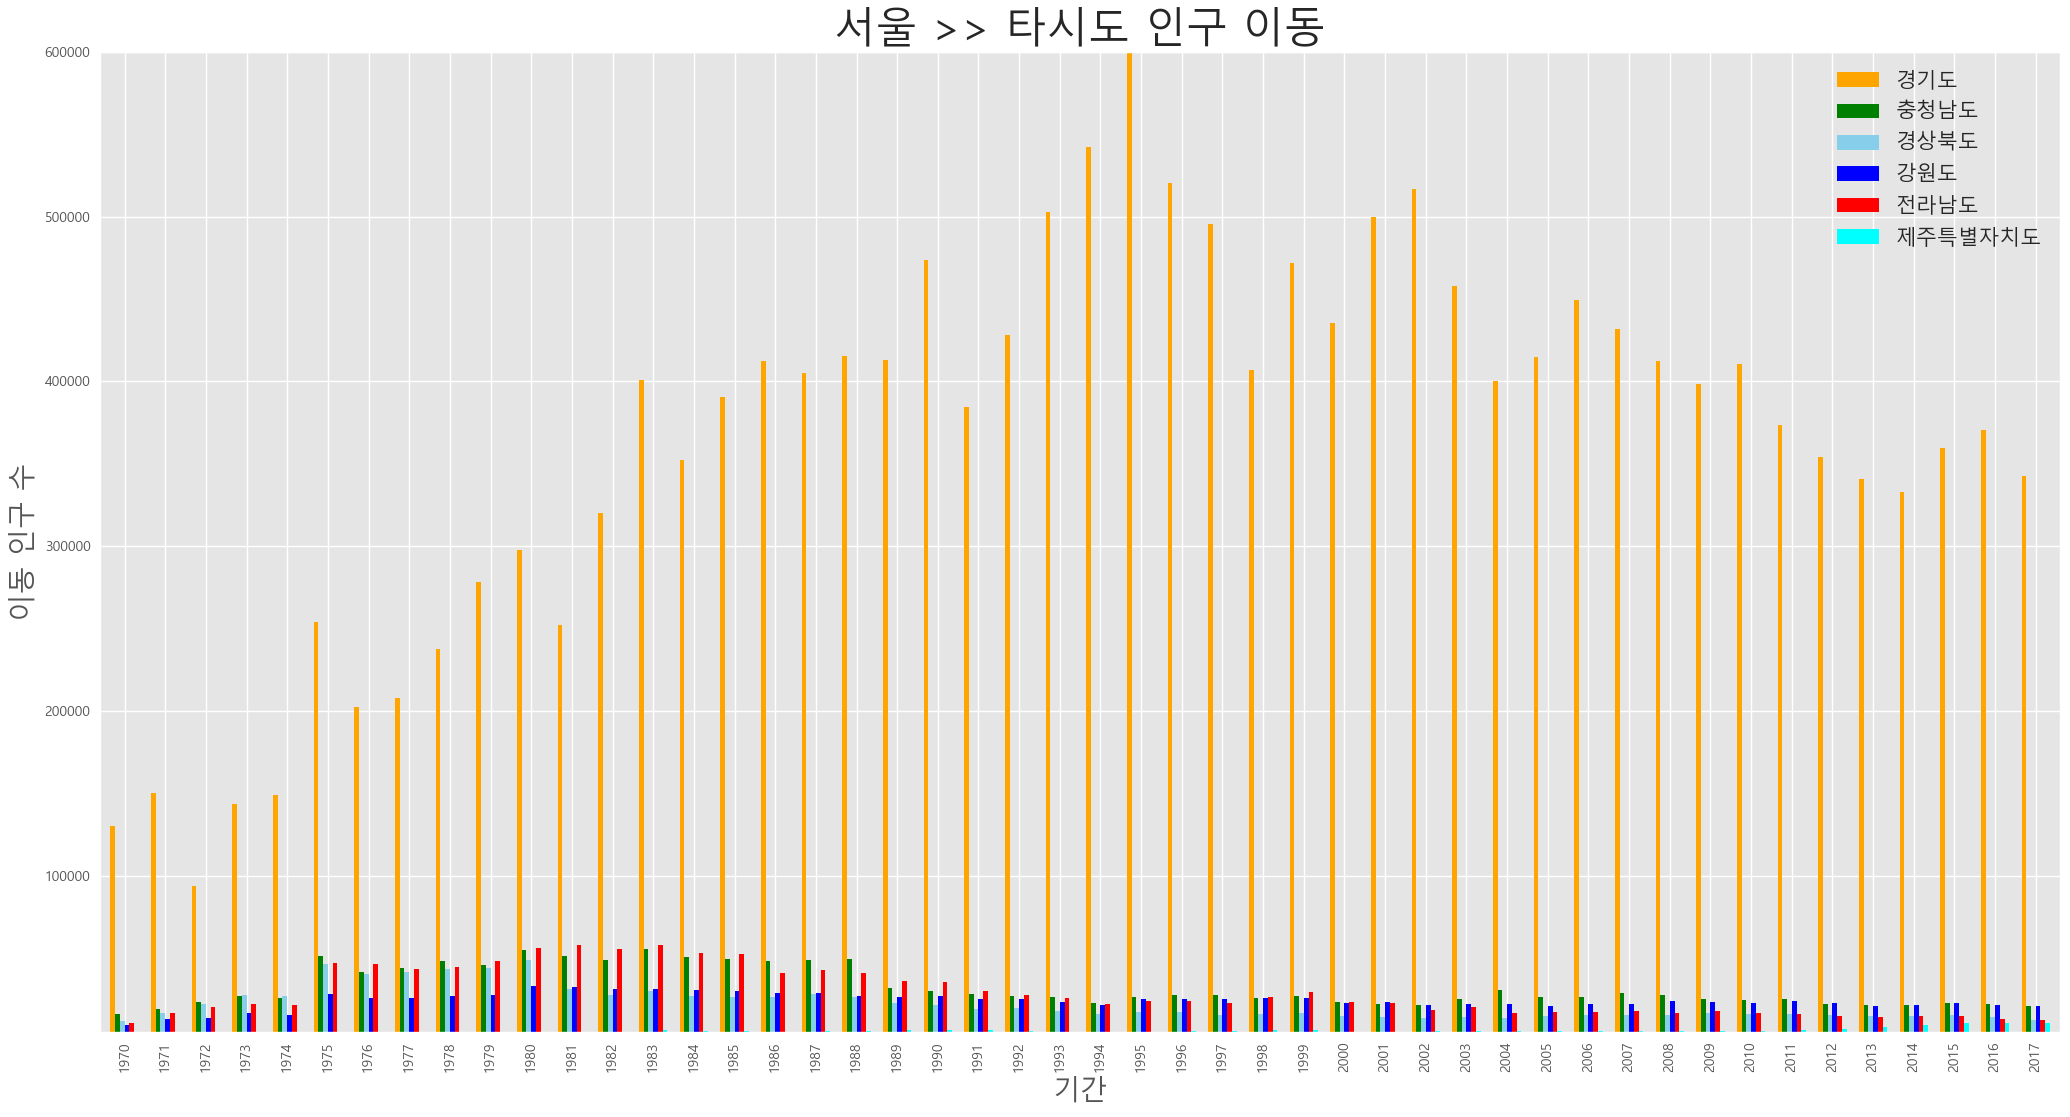

In [127]:
# bar 그래프 그리기

df_6.plot(kind = 'bar', figsize = (20, 10), width = 0.7,
          color = ['orange', 'green', 'skyblue', 'blue','red','cyan'])

plt.title('서울 >> 타시도 인구 이동', size = 30)

plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구 수', size = 20)
plt.ylim(5000, 600000)
plt.legend(loc = 'best', fontsize = 15)


plt.show()

In [128]:
# 2010 - 2017 년 이동 인구수 합계 >> 새로운 열 추가
df_6 = df_6.T
df_6['합계'] = df_6.sum(axis = 1)
df_6

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,,,,,,,,,,,,,
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,398282,410735,373771,354135,340801,332785,359337,370760,342433,17632067.0
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,24889,24522,24723,22269,21486,21473,22299,21741,21020,1529273.0
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,16569,16042,15818,15191,14420,14456,15113,14236,12464,1052175.0
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23331,22736,23624,22332,20601,21173,22659,21590,21016,1146275.0
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,17468,16429,15974,14765,14187,14591,14598,13065,12426,1381657.0
제주특별자치도,1039,1325,1617,2456,2261,3440,3623,3551,3937,4261,...,5332,5714,6133,6954,7828,9031,10434,10465,10404,260781.0


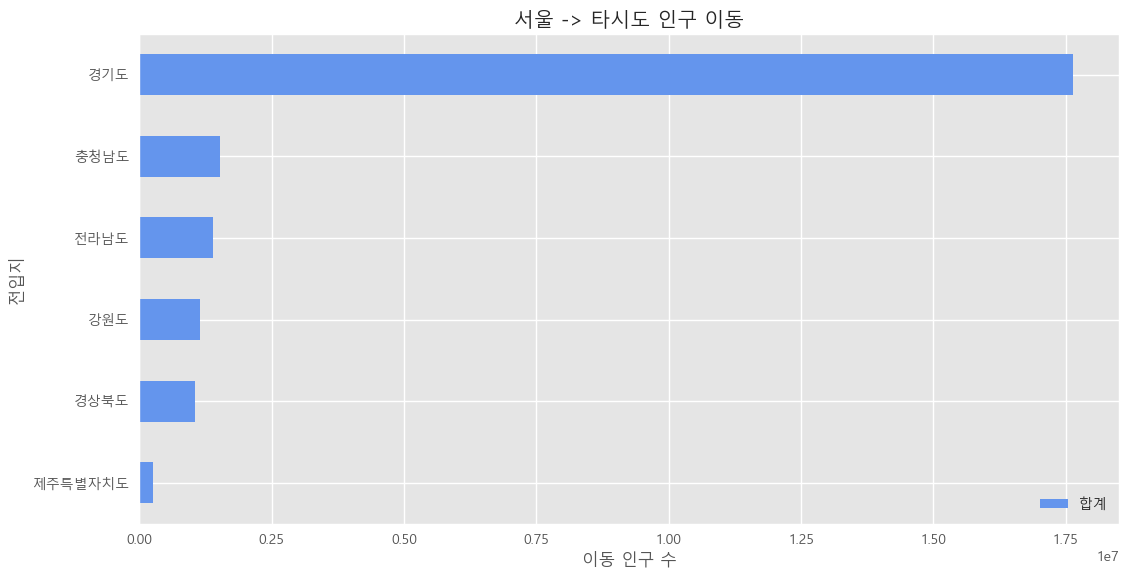

In [129]:
# 가장 큰 값부터 정렬

df_total = df_6[['합계']].sort_values(by = '합계', ascending = True)

df_total.plot(kind = 'barh', color = 'cornflowerblue', width = 0.5, figsize = (10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()